### Importing Libraries and setting env variables

In [1]:
import os
from groq import Groq
from dotenv import load_dotenv

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

load_dotenv()

api_key = os.getenv("GROQ_API_KEY")
client = Groq(api_key=api_key)

### Prompting Model

In [2]:
def get_code_from_model(query):
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": (
                    "You are a professional Python developer. "
                    "Answer all queries by generating only valid and clean Python code. "
                    "Do not provide any explanation or comments.\n\n"
                    "You have access to a dataset stored in 'household_power_consumption.csv'. "
                    "Load it in a DataFrame `df` as follows:\n"
                    "df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)\n\n"
                    "Clean it using:\n"
                    "df = df.dropna()\n"
                    "df['Global_active_power'] = df['Global_active_power'].astype(float)\n"
                    "df = df.set_index('datetime')\n\n"
                    "Columns in dataframe `df` are :  'Global_active_power', 'Global_reactive_power', 'Voltage', "
                    "'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'. "
                    "The index is 'datetime' "
                    "All columns have floating point values and datetime is the index."
                    "Give me full code and start from loading the data."
                )
            },
            {
                "role": "user",
                "content": query,
            }
        ],
        model="llama3-70b-8192",
        temperature=0,
        top_p=1,
    )

    response = chat_completion.choices[0].message.content
    return response

### 1. What was the average active power consumption in March 2007?

In [3]:
question = "What was the average active power consumption in March 2007?"

response = get_code_from_model(question)

print(response)

```
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

avg_power_march_2007 = df[(df.index.year == 2007) & (df.index.month == 3)]['Global_active_power'].mean()
print(avg_power_march_2007)
```


#### Running the code

In [4]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

avg_power_march_2007 = df[(df.index.year == 2007) & (df.index.month == 3)]['Global_active_power'].mean()
print(avg_power_march_2007)


1.3186270301754073


### 2. What hour of the day had the highest power usage on Christmas 2006?

In [5]:
question = "What hour of the day had the highest power usage on Christmas 2006?"

response = get_code_from_model(question)

print(response)

```
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

christmas_2006 = df[(df.index.year == 2006) & (df.index.month == 12)]
hourly_usage = christmas_2006.resample('H')['Global_active_power'].max().reset_index()
hour_with_max_usage = hourly_usage.loc[hourly_usage['Global_active_power'] == hourly_usage['Global_active_power'].max()]

print(hour_with_max_usage['datetime'].dt.hour)
```


#### Running the code

In [6]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

christmas_2006 = df[(df.index.year == 2006) & (df.index.month == 12)]
hourly_usage = christmas_2006.resample('H')['Global_active_power'].max().reset_index()
hour_with_max_usage = hourly_usage.loc[hourly_usage['Global_active_power'] == hourly_usage['Global_active_power'].max()]

print(hour_with_max_usage['datetime'].dt.hour)

292    21
Name: datetime, dtype: int32


### 3. Compare energy usage (Global_active_power) on weekdays vs weekends.

In [7]:
question = "Compare energy usage (Global_active_power) on weekdays vs weekends."

response = get_code_from_model(question)

print(response)

```
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)

df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

df['day_of_week'] = df.index.dayofweek
weekdays = df[df['day_of_week'] < 5]
weekends = df['day_of_week'] >= 5

print(weekdays['Global_active_power'].mean())
print(weekends['Global_active_power'].mean())
```


#### Running the code

In [8]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)

df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

df['day_of_week'] = df.index.dayofweek
weekdays = df[df['day_of_week'] < 5]
weekends = df['day_of_week'] >= 5

print(weekdays['Global_active_power'].mean())
print(weekends['Global_active_power'].mean())

1.0354720516747509


KeyError: 'Global_active_power'

### 4. Find days where energy consumption exceeded 5 kWh.

In [9]:
question = "Find days where energy consumption exceeded 5 kWh."

response = get_code_from_model(question)

print(response)

```
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

exceeded_days = df[df['Global_active_power'] > 5].resample('D').sum()
```


#### Running the code

In [10]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

exceeded_days = df[df['Global_active_power'] > 5].resample('D').sum()
exceeded_days

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,89.484,3.420,3491.04,384.8,0.0,181.0,250.0
2006-12-17,178.436,6.856,7269.79,761.8,505.0,1081.0,334.0
2006-12-18,16.760,1.024,697.52,72.6,0.0,72.0,17.0
2006-12-19,166.184,5.158,6334.00,711.6,672.0,1335.0,387.0
2006-12-20,96.488,1.400,4011.90,408.4,0.0,518.0,290.0
...,...,...,...,...,...,...,...
2010-11-21,0.000,0.000,0.00,0.0,0.0,0.0,0.0
2010-11-22,55.614,1.568,2325.71,243.0,438.0,3.0,35.0
2010-11-23,0.000,0.000,0.00,0.0,0.0,0.0,0.0


### 5. Plot the energy usage trend for the first week of January 2007.

In [11]:
question = "Plot the energy usage trend for the first week of January 2007.."

response = get_code_from_model(question)

print(response)

```
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

df_first_week = df['2007-01-01':'2007-01-07')
df_first_week['Global_active_power'].plot()
plt.show()
```


#### Running the code

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

df_first_week = df['2007-01-01':'2007-01-07')
df_first_week['Global_active_power'].plot()
plt.show()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2847655202.py, line 9)

### 6. Find the average voltage for each day of the first week of February 2007.

In [13]:
question = "Find the average voltage for each day of the first week of February 2007"

response = get_code_from_model(question)

print(response)

```
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

df_february_2007'] = df['2007-02'].resample('D')['Voltage'].mean()
print(df_february_2007.head(7))
```


#### Running the code

In [14]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

df_february_2007'] = df['2007-02'].resample('D')['Voltage'].mean()
print(df_february_2007.head(7))

SyntaxError: invalid syntax (4116217346.py, line 8)

### 7. What is the correlation between global active power and sub-metering values?

In [15]:
question = "What is the correlation between global active power and sub-metering values?"

response = get_code_from_model(question)

print(response)

```
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)

df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

corr_sub_metering = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()
print(corr_sub_metering)
```


#### Running the code

In [16]:
import pandas as pd

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)

df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

corr_sub_metering = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()
print(corr_sub_metering)

                     Global_active_power  Sub_metering_1  Sub_metering_2  \
Global_active_power             1.000000        0.484401        0.434569   
Sub_metering_1                  0.484401        1.000000        0.054721   
Sub_metering_2                  0.434569        0.054721        1.000000   
Sub_metering_3                  0.638555        0.102571        0.080872   

                     Sub_metering_3  
Global_active_power        0.638555  
Sub_metering_1             0.102571  
Sub_metering_2             0.080872  
Sub_metering_3             1.000000  


### 7.1 What is the correlation between global active power and sub-metering values? Give me a plot also

In [ ]:
question = "What is the correlation between global active power and sub-metering values? Give me a plot also"

response = get_code_from_model(question)

print(response)

```
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

corr = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()
print(corr)

plt.figure(figsize=(10,8))
plt.imshow(corr, interpolation='nearest')
plt.title("Correlation Matrix")
plt.colorbar()
plt.show()
```


#### Running the code

                     Global_active_power  Sub_metering_1  Sub_metering_2  \
Global_active_power             1.000000        0.484401        0.434569   
Sub_metering_1                  0.484401        1.000000        0.054721   
Sub_metering_2                  0.434569        0.054721        1.000000   
Sub_metering_3                  0.638555        0.102571        0.080872   

                     Sub_metering_3  
Global_active_power        0.638555  
Sub_metering_1             0.102571  
Sub_metering_2             0.080872  
Sub_metering_3             1.000000  


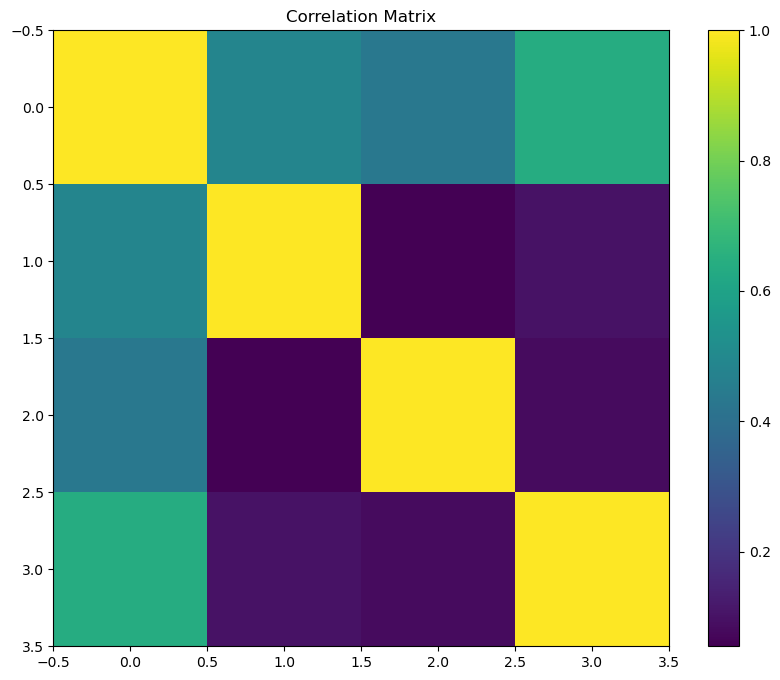

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

corr = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()
print(corr)

plt.figure(figsize=(10,8))
plt.imshow(corr, interpolation='nearest')
plt.title("Correlation Matrix")
plt.colorbar()
plt.show()